# Introduction

## 1.1 Overview of the Competition

The competition is organized by Kaggle, a platform renowned for hosting data science and machine learning challenges. These competitions offer data enthusiasts the opportunity to work with diverse datasets, apply advanced analytical techniques, and improve their skills. This particular competition focuses on predicting flood probabilities using a dataset that contains a sum of Poisson distributions. Participants are required to develop models that can accurately predict the flood probability based on various features provided in the dataset.

## 1.2 Goal and Objectives

The primary goal of this competition is to build a robust machine learning model that can accurately predict flood probabilities. The objectives are to explore different modeling techniques, apply effective feature engineering, and use ensemble methods to improve prediction accuracy. Through this competition, participants will enhance their understanding of machine learning algorithms, particularly Gradient Boosting Machines (GBMs), and develop strategies for effective model validation and ensemble learning.

## 1.3 Evaluation Metric

The models in this competition are evaluated using the R2 score, which is a statistical measure of how well the regression predictions approximate the real data points. An R2 score of 1 indicates that the regression predictions perfectly fit the data, while a score of 0 indicates that the model does not explain any of the variability of the response data around its mean. The goal is to achieve the highest possible R2 score on both the public and private leaderboards, demonstrating the model's predictive accuracy and generalizability.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data train
file = '/content/drive/MyDrive/Colab Notebooks/Dataset/Kaggle/train.csv'
df_train = pd.read_csv(file)

In [ ]:
# Load data test
file1 = '/content/drive/MyDrive/Colab Notebooks/Dataset/Kaggle/test.csv'
df_test = pd.read_csv(file1)

# Exploratory Data Analysis (EDA)

## 2.1 Initial Data Inspection

### 2.1.1 Data Structure and Types

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [ ]:
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


### 2.1.2 Summary Statistics

In [ ]:
# Display summary statistics for the training dataset
print("Training Data Summary Statistics:")
df_train.describe()

Training Data Summary Statistics:


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


### 2.1.3 Distribution Analysis of FloodProbability

In [ ]:
# Describe the distribution of the target variable 'FloodProbability'
flood_prob_stats = df_train['FloodProbability'].describe()

# Calculate skewness and kurtosis for 'FloodProbability'
flood_prob_skewness = df_train['FloodProbability'].skew()
flood_prob_kurtosis = df_train['FloodProbability'].kurt()

print("Summary Statistics for FloodProbability:")
print(flood_prob_stats)
print("\nSkewness of FloodProbability:", flood_prob_skewness)
print("Kurtosis of FloodProbability:", flood_prob_kurtosis)


Summary Statistics for FloodProbability:
count    1.117957e+06
mean     5.044803e-01
std      5.102610e-02
min      2.850000e-01
25%      4.700000e-01
50%      5.050000e-01
75%      5.400000e-01
max      7.250000e-01
Name: FloodProbability, dtype: float64

Skewness of FloodProbability: 0.04722558628639714
Kurtosis of FloodProbability: -0.03960877966632603


* Skewness: 0.047 (indicates a slight right skew)
* Kurtosis: -0.040 (indicates a distribution close to normal but slightly flatter)

### 2.1.6 Correlation Matrix Analysis

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# testing

# Extract the pairs of features with the highest correlation
def get_top_correlations(corr_matrix, num_pairs=10):
    corr_pairs = corr_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
    # Remove self-correlations
    sorted_pairs = sorted_pairs[sorted_pairs < 1]
    top_pairs = sorted_pairs[:num_pairs]
    return top_pairs

# Extract the pairs of features with the lowest (most negative) correlation
def get_bottom_correlations(corr_matrix, num_pairs=10):
    corr_pairs = corr_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=True)
    # Remove self-correlations
    sorted_pairs = sorted_pairs[sorted_pairs > -1]
    bottom_pairs = sorted_pairs[:num_pairs]
    return bottom_pairs

# Get the top 10 most positively correlated pairs of features
top_correlations = get_top_correlations(correlation_matrix, 10)
print("Top 10 Most Positively Correlated Feature Pairs:")
print(top_correlations)

# Get the top 10 most negatively correlated pairs of features
bottom_correlations = get_bottom_correlations(correlation_matrix, 10)
print("\nTop 10 Most Negatively Correlated Feature Pairs:")
print(bottom_correlations)


Top 10 Most Positively Correlated Feature Pairs:
FloodProbability             DeterioratingInfrastructure    0.190007
DeterioratingInfrastructure  FloodProbability               0.190007
MonsoonIntensity             FloodProbability               0.189098
FloodProbability             MonsoonIntensity               0.189098
                             DamsQuality                    0.187996
DamsQuality                  FloodProbability               0.187996
FloodProbability             TopographyDrainage             0.187635
TopographyDrainage           FloodProbability               0.187635
FloodProbability             RiverManagement                0.187131
RiverManagement              FloodProbability               0.187131
dtype: float64

Top 10 Most Negatively Correlated Feature Pairs:
CoastalVulnerability  Encroachments          -0.016203
Encroachments         CoastalVulnerability   -0.016203
Urbanization          CoastalVulnerability   -0.014497
CoastalVulnerability  Urbanizat

## 2.2 Data Visualization

### 2.2.1 Distribution of Target Variable

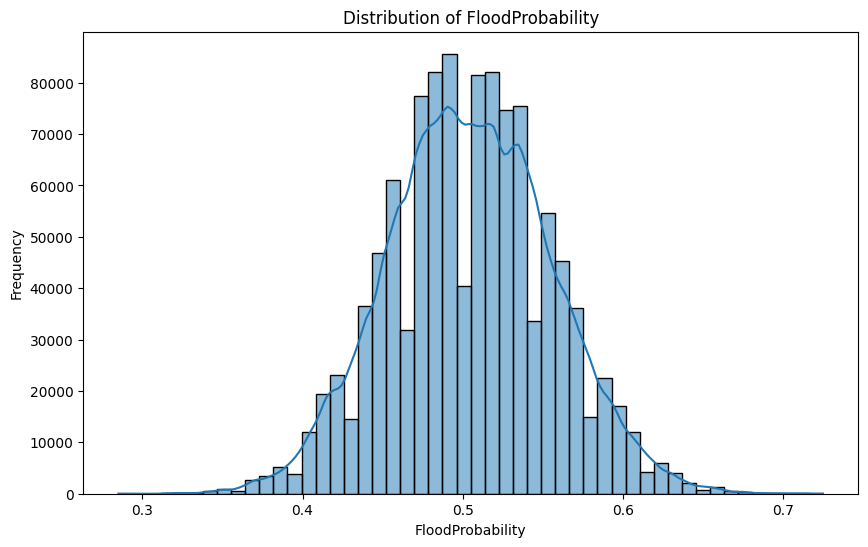

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'FloodProbability'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['FloodProbability'], bins=50, kde=True)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()

### 2.2.2 Correlation Matrix and Heatmap

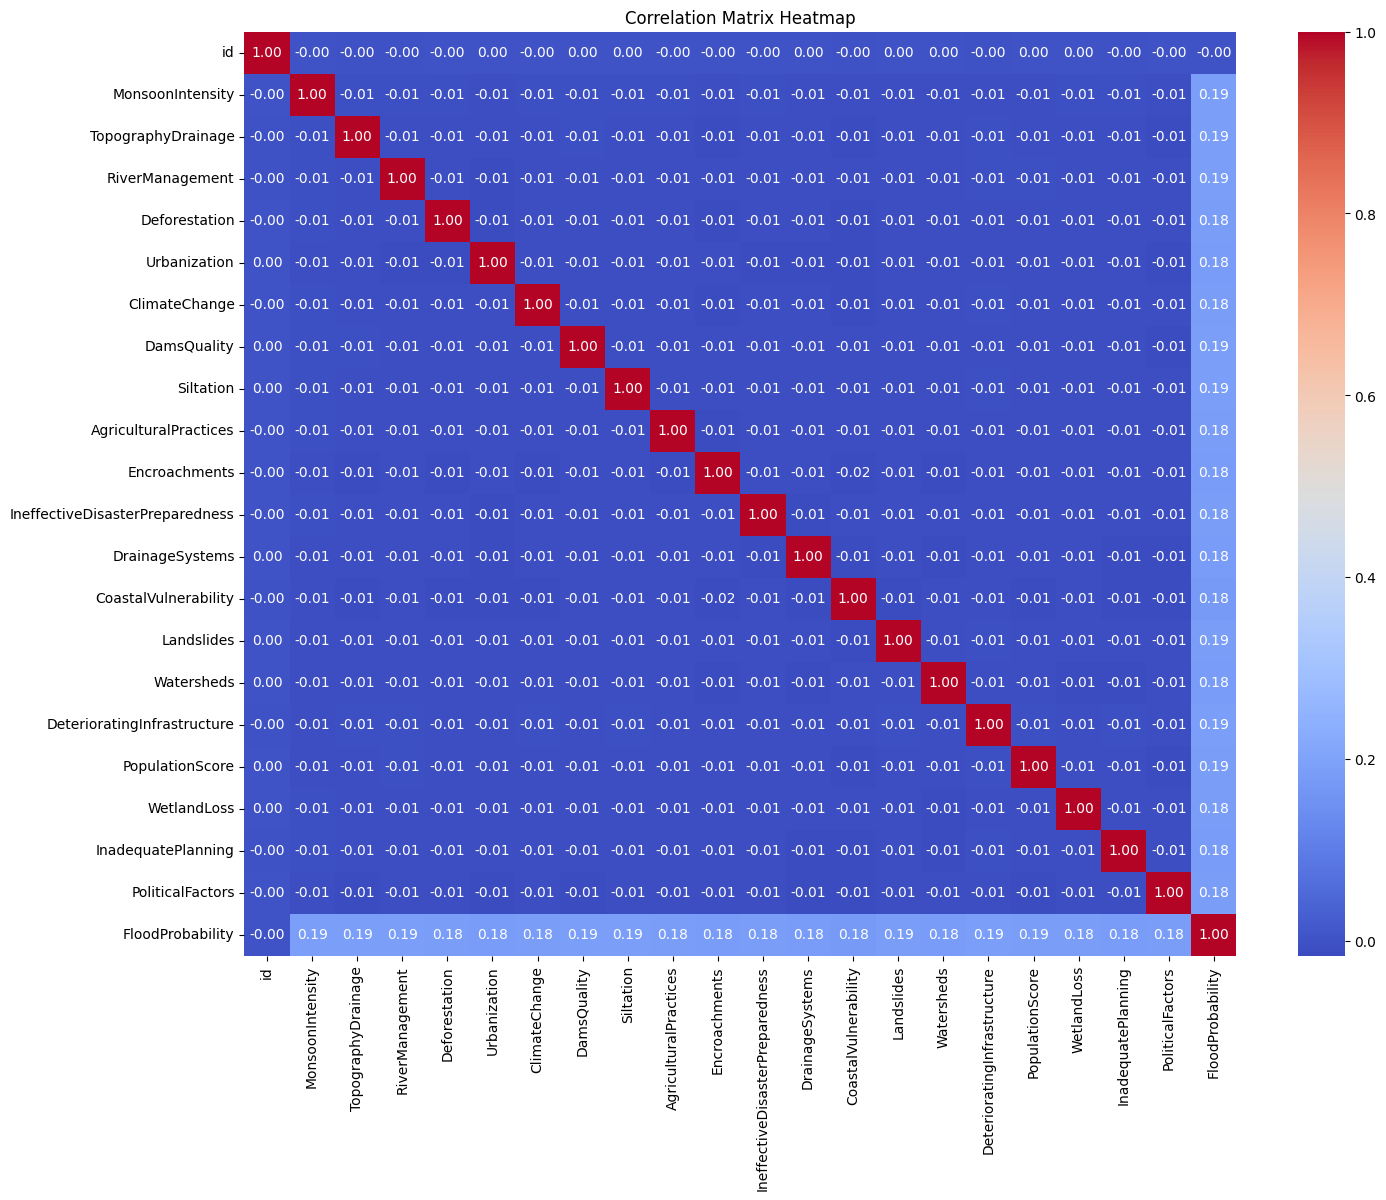

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## 2.3 Feature Analysis

### 2.3.1 Identifying Key Features

In [ ]:
# Compute the correlation of all features with the target variable 'FloodProbability'
target_correlation = correlation_matrix['FloodProbability'].sort_values(ascending=False)

# Display features with the highest correlation to 'FloodProbability'
print("Top Features Correlated with FloodProbability:")
print(target_correlation.head(10))


Top Features Correlated with FloodProbability:
FloodProbability               1.000000
DeterioratingInfrastructure    0.190007
MonsoonIntensity               0.189098
DamsQuality                    0.187996
TopographyDrainage             0.187635
RiverManagement                0.187131
Siltation                      0.186789
PopulationScore                0.185890
Landslides                     0.185346
ClimateChange                  0.184761
Name: FloodProbability, dtype: float64


### 2.3.2 Identifying Redundant Features

In [ ]:
# Identify features that have a high correlation with each other
threshold = 0.9  # Correlation threshold for identifying redundant features
redundant_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            redundant_features.add(colname)

print("Redundant Features:")
print(redundant_features)


Redundant Features:
set()


# Data Preprocessing

## 3.1 Handling Missing Values

In [ ]:
# Check for missing values in df_train
missing_values_train = df_train.isnull().sum()
print("Missing Values in Training Data:\n", missing_values_train[missing_values_train > 0])

# Check for missing values in df_test
missing_values_test = df_test.isnull().sum()
print("\nMissing Values in Test Data:\n", missing_values_test[missing_values_test > 0])


Missing Values in Training Data:
 Series([], dtype: int64)

Missing Values in Test Data:
 Series([], dtype: int64)


## 3.2 Handling Duplicate Data

In [ ]:
# Check for duplicate rows in df_train
duplicates_train = df_train.duplicated().sum()
print("Number of duplicate rows in Training Data:", duplicates_train)

# Remove duplicate rows in df_train if any
if duplicates_train > 0:
    df_train = df_train.drop_duplicates()

# Check for duplicate rows in df_test
duplicates_test = df_test.duplicated().sum()
print("Number of duplicate rows in Test Data:", duplicates_test)

# Remove duplicate rows in df_test if any
if duplicates_test > 0:
    df_test = df_test.drop_duplicates()


Number of duplicate rows in Training Data: 0
Number of duplicate rows in Test Data: 0


## 3.3 Feature Engineering

### 3.3.1 Creating New Features

In [ ]:
# Creating interaction terms between highly correlated features
df_train['Infra_Monsoon'] = df_train['DeterioratingInfrastructure'] * df_train['MonsoonIntensity']
df_test['Infra_Monsoon'] = df_test['DeterioratingInfrastructure'] * df_test['MonsoonIntensity']

# Creating polynomial features
df_train['DamsQuality_squared'] = df_train['DamsQuality'] ** 2
df_test['DamsQuality_squared'] = df_test['DamsQuality'] ** 2


### 3.3.2 Feature Transformation

In [ ]:
# Log transformation of skewed features
skewed_features = ['MonsoonIntensity', 'TopographyDrainage']
for feature in skewed_features:
    df_train[feature + '_log'] = np.log1p(df_train[feature])
    df_test[feature + '_log'] = np.log1p(df_test[feature])


## 3.4 Data Normalization and Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of features to be scaled
features_to_scale = ['DeterioratingInfrastructure', 'MonsoonIntensity', 'DamsQuality', 'TopographyDrainage', 'RiverManagement']

scaler = StandardScaler()

# Apply scaling to training data
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

# Apply the same scaling to test data
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])


## 3.5 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['FloodProbability'])
y = df_train['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection and Training

## 4.1 Model Selection

### 4.1.1 Model Comparison

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Initialize models
models = [
    ('LightGBM', LGBMRegressor()),
    ('XGBoost', XGBRegressor()),
    ('CatBoost', CatBoostRegressor(silent=True))  # silent=True untuk mengurangi output log CatBoost
]

# Compare models
for name, model in models:
    print(f"Training {name}...")
    # Perform cross-validation
    cv_scores = cross_val_score(model, df_train.drop(columns=['FloodProbability']), df_train['FloodProbability'],
                                cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    # Print results
    print(f"{name} RMSE: {rmse_scores.mean():.4f} +/- {rmse_scores.std():.4f}")



Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 25
[LightGBM] [Info] Start training from score 0.504471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.358402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 25
[LightGBM] [Info] Start training from score 0.504463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.217908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data poi

### 4.1.2 Justification for Selected Models

## 4.2 Cross-Validation Strategy

### 4.2.1 K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold

# Define K-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Example of using K-Fold CV for model evaluation (LightGBM)
for fold, (train_idx, valid_idx) in enumerate(kf.split(df_train)):
    print(f"Fold {fold + 1}")
    train_data = df_train.iloc[train_idx]
    valid_data = df_train.iloc[valid_idx]

    model = LGBMRegressor()
    model.fit(train_data.drop(columns=['FloodProbability']), train_data['FloodProbability'])

    # Evaluate on validation set
    predictions = model.predict(valid_data.drop(columns=['FloodProbability']))
    rmse = np.sqrt(mean_squared_error(valid_data['FloodProbability'], predictions))
    print(f"Validation RMSE: {rmse:.4f}")


Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.293966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 25
[LightGBM] [Info] Start training from score 0.504480
Validation RMSE: 0.0243
Fold 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 25
[LightGBM] [Info] Start training from score 0.504511
Validation RMSE: 0.0244
Fold 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.213307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

### 4.2.2 Repeated K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import RepeatedKFold

# Define Repeated K-Fold CV
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Example of using Repeated K-Fold CV for model evaluation (XGBoost)
for fold, (train_idx, valid_idx) in enumerate(rkf.split(df_train)):
    print(f"Fold {fold + 1}")
    train_data = df_train.iloc[train_idx]
    valid_data = df_train.iloc[valid_idx]

    model = XGBRegressor()
    model.fit(train_data.drop(columns=['FloodProbability']), train_data['FloodProbability'])

    # Evaluate on validation set
    predictions = model.predict(valid_data.drop(columns=['FloodProbability']))
    rmse = np.sqrt(mean_squared_error(valid_data['FloodProbability'], predictions))
    print(f"Validation RMSE: {rmse:.4f}")


Fold 1
Validation RMSE: 0.0222
Fold 2
Validation RMSE: 0.0222
Fold 3
Validation RMSE: 0.0222
Fold 4
Validation RMSE: 0.0222
Fold 5
Validation RMSE: 0.0222
Fold 6
Validation RMSE: 0.0221
Fold 7
Validation RMSE: 0.0222
Fold 8
Validation RMSE: 0.0221
Fold 9
Validation RMSE: 0.0222
Fold 10
Validation RMSE: 0.0221
Fold 11
Validation RMSE: 0.0222
Fold 12
Validation RMSE: 0.0222
Fold 13
Validation RMSE: 0.0222
Fold 14
Validation RMSE: 0.0223
Fold 15
Validation RMSE: 0.0222


## 4.3 Training Individual Models

### 4.3.1 LightGBM

In [ ]:
# Training LightGBM on the entire training set
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.223501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 25
[LightGBM] [Info] Start training from score 0.504480


LGBMRegressor()

### 4.3.2 XGBoost

In [ ]:
# Training XGBoost on the entire training set
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 4.3.3 CatBoost

In [ ]:
# Training CatBoost on the entire training set
catboost_model = CatBoostRegressor(silent=True)
catboost_model.fit(X_train, y_train)


### 4.3.4 Additional Models (if any)

# Ensemble Learning

## 5.1 Stacking Models

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def get_out_of_fold_predictions(model, X_train, y_train, X_test, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_train = np.zeros((X_train.shape[0],))
    oof_test = np.zeros((X_test.shape[0], n_splits))

    for fold, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
        train_data = X_train.iloc[train_idx]
        valid_data = X_train.iloc[valid_idx]

        model.fit(train_data, y_train.iloc[train_idx])
        oof_train[valid_idx] = model.predict(valid_data)
        oof_test[:, fold] = model.predict(X_test)

    return oof_train, oof_test.mean(axis=1)

# Example usage for stacking
# Assuming you have trained models like lgbm_model, xgb_model, catboost_model
# and X_train, y_train, X_test are your dataframes/arrays

# Generate out-of-fold predictions for each model
lgbm_oof_train, lgbm_oof_test = get_out_of_fold_predictions(lgbm_model, X_train, y_train, X_test)
xgb_oof_train, xgb_oof_test = get_out_of_fold_predictions(xgb_model, X_train, y_train, X_test)
catboost_oof_train, catboost_oof_test = get_out_of_fold_predictions(catboost_model, X_train, y_train, X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 25
[LightGBM] [Info] Start training from score 0.504462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.292687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 25
[LightGBM] [Info] Start training from score 0.504499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 25
[LightGBM] [Info] Start tra

### 5.1.1 Generating Out-of-Fold Predictions

In [ ]:
# Create meta-features (features from the predictions of base models)
meta_train = np.column_stack((lgbm_oof_train, xgb_oof_train, catboost_oof_train))
meta_test = np.column_stack((lgbm_oof_test, xgb_oof_test, catboost_oof_test))


### 5.1.2 Creating Meta-Features

## 5.2 Blending Models

In [ ]:
# Example of weighted averaging for blending
blend_predictions = 0.4 * lgbm_oof_test + 0.3 * xgb_oof_test + 0.3 * catboost_oof_test


### 5.2.1 Weighted Averaging

In [ ]:
# Example of weighted averaging for blending
blend_predictions = 0.4 * lgbm_oof_test + 0.3 * xgb_oof_test + 0.3 * catboost_oof_test


## 5.3 Ridge Regression for Final Ensemble

### 5.3.1 Ridge Regression Theory

### 5.3.2 Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize Ridge Regression
ridge_model = Ridge(alpha=1.0)

# Fit Ridge Regression on meta-features
ridge_model.fit(meta_train, y_train)

# Predict on meta-features for test set
ridge_predictions = ridge_model.predict(meta_test)

# Evaluate Ridge Regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Ridge Regression RMSE: {ridge_rmse:.4f}")


Ridge Regression RMSE: 0.0200


# Model Evaluation

## 6.1 Evaluating Individual Models

In [ ]:
from sklearn.metrics import mean_squared_error

# Example assuming lgbm_model is already trained and X_test, y_test are defined
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_predictions))
print(f"LightGBM RMSE: {lgbm_rmse:.4f}")


LightGBM RMSE: 0.0243


In [ ]:
# Example assuming xgb_model is already trained and X_test, y_test are defined
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f"XGBoost RMSE: {xgb_rmse:.4f}")


XGBoost RMSE: 0.0223


In [ ]:
# Example assuming catboost_model is already trained and X_test, y_test are defined
catboost_predictions = catboost_model.predict(X_test)
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))
print(f"CatBoost RMSE: {catboost_rmse:.4f}")


CatBoost RMSE: 0.0200


## 6.2 Evaluating the Ensemble Model

In [ ]:
# Example assuming ridge_predictions is already calculated
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Ridge Regression RMSE: {ridge_rmse:.4f}")


Ridge Regression RMSE: 0.0200


### 6.2.1 Validation Score Analysis

In [ ]:
# Example assuming ridge_predictions is already calculated
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Ridge Regression RMSE: {ridge_rmse:.4f}")


Ridge Regression RMSE: 0.0200


### 6.2.2 Public and Private Leaderboard Scores

## 6.3 Feature Importance Analysis

### 6.3.1 Permutation Feature Importance

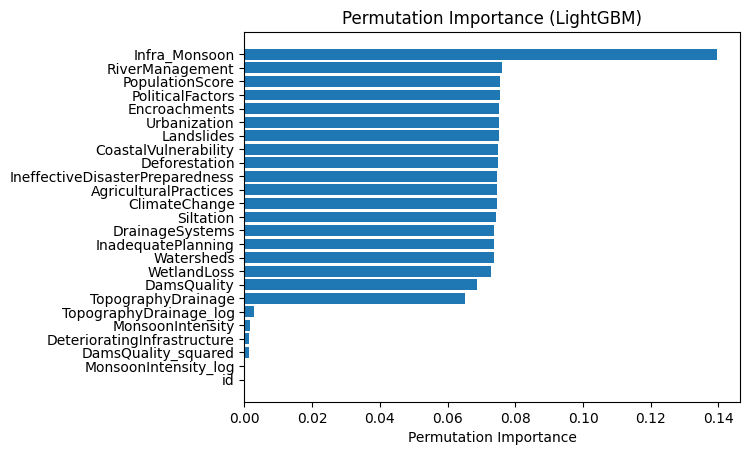

In [ ]:
from sklearn.inspection import permutation_importance

# Example for LightGBM model
perm_importance = permutation_importance(lgbm_model, X_test, y_test, n_repeats=10, random_state=42)

# Visualize permutation importance if needed
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance (LightGBM)")
plt.show()


### 6.3.2 Feature Importance from Models

In [ ]:
# Example for CatBoost model if it provides feature importances directly
if hasattr(catboost_model, 'feature_importances_'):
    catboost_feature_importance = catboost_model.feature_importances_
    # Plot or print feature importances as needed


# Hyperparameter Tuning

## 7.1 Tuning Strategy

#### a. Random Search

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid for LightGBM
# param_grid_lgbm = {
#     'num_leaves': [31, 50, 100],
#     'learning_rate': [0.01, 0.1, 0.05],
#     'n_estimators': [100, 500, 1000]
# }

# # Random Search CV for LightGBM
# lgbm_random = RandomizedSearchCV(LGBMRegressor(), param_grid_lgbm, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
# lgbm_random.fit(X_train, y_train)

# print(f"Best parameters for LightGBM: {lgbm_random.best_params_}")
# print(f"Best score for LightGBM: {np.sqrt(-lgbm_random.best_score_):.4f}")


#### b. Grid Search

## 7.2 Using Optuna for Hyperparameter Optimization

In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import optuna

# Define the objective function for Optuna
def objective(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 100, 300),  # Reduce max iterations
        "depth": trial.suggest_int("depth", 3, 6),  # Reduce range for depth
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 5e-2, log=True),
        "random_strength": trial.suggest_float("random_strength", 0, 3),  # Reduce range for random_strength
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 0.5),
        "border_count": trial.suggest_int("border_count", 1, 64),  # Reduce max border_count
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 5, log=True)
    }

    # Split the training data further into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    model = CatBoostRegressor(**param, silent=True)
    model.fit(X_train_split, y_train_split)

    preds = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, preds))

    return rmse

# Create a study object and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  # Further reduce number of trials

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")

[I 2024-06-23 07:36:45,393] A new study created in memory with name: no-name-f5bfa4bf-b364-4995-8c41-c9addf42c8ee
[I 2024-06-23 07:37:24,676] Trial 0 finished with value: 0.043384652253075535 and parameters: {'iterations': 179, 'depth': 3, 'learning_rate': 0.013751671605726087, 'random_strength': 0.07953561297363732, 'bagging_temperature': 0.04010667975723026, 'border_count': 22, 'l2_leaf_reg': 1.3273242418101185}. Best is trial 0 with value: 0.043384652253075535.
[I 2024-06-23 07:37:55,765] Trial 1 finished with value: 0.04427633401030366 and parameters: {'iterations': 208, 'depth': 3, 'learning_rate': 0.010176535110305383, 'random_strength': 1.7137659389200568, 'bagging_temperature': 0.4143455881326938, 'border_count': 46, 'l2_leaf_reg': 0.8842777938809211}. Best is trial 0 with value: 0.043384652253075535.
[I 2024-06-23 07:38:18,680] Trial 2 finished with value: 0.04255358956228863 and parameters: {'iterations': 189, 'depth': 3, 'learning_rate': 0.01488744457073415, 'random_strength

Best hyperparameters: {'iterations': 278, 'depth': 5, 'learning_rate': 0.04945500374753562, 'random_strength': 2.277711880998856, 'bagging_temperature': 0.2808236979046239, 'border_count': 57, 'l2_leaf_reg': 0.038396799400048774}


In [ ]:
# Train the final model using the best hyperparameters
best_params = study.best_params
catboost_best = CatBoostRegressor(**best_params, silent=True)
catboost_best.fit(X_train, y_train)

# Predict on test set
catboost_predictions = catboost_best.predict(X_test)
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))
print(f"Tuned CatBoost RMSE: {catboost_rmse:.4f}")

Tuned CatBoost RMSE: 0.0238


## 7.3 Best Practices for Tuning GBM Models

In [ ]:
# Best Practices for Tuning GBM Models

# 1. Start with default parameters
default_model = CatBoostRegressor(silent=True)
default_model.fit(X_train, y_train)
default_predictions = default_model.predict(X_test)
default_rmse = np.sqrt(mean_squared_error(y_test, default_predictions))
print(f"Default CatBoost RMSE: {default_rmse:.4f}")

Default CatBoost RMSE: 0.0200


In [ ]:
# 2. Tune parameters iteratively
# Step 1: Tune learning_rate and iterations
def tune_step1(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 100, 300),  # Reduce max iterations
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 5e-2, log=True),
    }
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = CatBoostRegressor(**param, silent=True)
    model.fit(X_train_split, y_train_split)
    preds = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, preds))
    return rmse

study_step1 = optuna.create_study(direction="minimize")
study_step1.optimize(tune_step1, n_trials=20)  # Further reduce number of trials
best_params_step1 = study_step1.best_params
print(f"Best params after step 1: {best_params_step1}")

[I 2024-06-23 07:58:04,772] A new study created in memory with name: no-name-d44ae070-a140-4eca-8774-55608c7087c2
[I 2024-06-23 07:58:47,564] Trial 0 finished with value: 0.04196082639605488 and parameters: {'iterations': 207, 'learning_rate': 0.007315384942105889}. Best is trial 0 with value: 0.04196082639605488.
[I 2024-06-23 07:59:49,565] Trial 1 finished with value: 0.022285156295943628 and parameters: {'iterations': 300, 'learning_rate': 0.049899903097975394}. Best is trial 1 with value: 0.022285156295943628.
[I 2024-06-23 08:00:31,581] Trial 2 finished with value: 0.047491428358467445 and parameters: {'iterations': 230, 'learning_rate': 0.002122258818334948}. Best is trial 1 with value: 0.022285156295943628.
[I 2024-06-23 08:01:01,196] Trial 3 finished with value: 0.0466693847054181 and parameters: {'iterations': 165, 'learning_rate': 0.0037490117747372475}. Best is trial 1 with value: 0.022285156295943628.
[I 2024-06-23 08:01:48,839] Trial 4 finished with value: 0.03396855161877

Best params after step 1: {'iterations': 300, 'learning_rate': 0.049899903097975394}


In [ ]:
# Step 2: Tune depth and l2_leaf_reg
def tune_step2(trial):
    param = {
        "iterations": best_params_step1['iterations'],
        "learning_rate": best_params_step1['learning_rate'],
        "depth": trial.suggest_int("depth", 3, 6),  # Reduce range for depth
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 5, log=True),
    }
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model = CatBoostRegressor(**param, silent=True)
    model.fit(X_train_split, y_train_split)
    preds = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, preds))
    return rmse

study_step2 = optuna.create_study(direction="minimize")
study_step2.optimize(tune_step2, n_trials=20)  # Further reduce number of trials
best_params_step2 = study_step2.best_params
print(f"Best params after step 2: {best_params_step2}")

[I 2024-06-23 08:10:33,035] A new study created in memory with name: no-name-6c9b0d78-e91a-4de1-b4c6-30c943589a5c
[I 2024-06-23 08:11:16,852] Trial 0 finished with value: 0.022281656178894084 and parameters: {'depth': 6, 'l2_leaf_reg': 1.1760049025958688}. Best is trial 0 with value: 0.022281656178894084.
[I 2024-06-23 08:11:54,416] Trial 1 finished with value: 0.02490865253520399 and parameters: {'depth': 4, 'l2_leaf_reg': 0.0016680500981326259}. Best is trial 0 with value: 0.022281656178894084.
[I 2024-06-23 08:12:29,633] Trial 2 finished with value: 0.02490865225864325 and parameters: {'depth': 4, 'l2_leaf_reg': 0.0011979880370732846}. Best is trial 0 with value: 0.022281656178894084.
[I 2024-06-23 08:13:01,522] Trial 3 finished with value: 0.027413637178002218 and parameters: {'depth': 3, 'l2_leaf_reg': 0.0075566433225669445}. Best is trial 0 with value: 0.022281656178894084.
[I 2024-06-23 08:13:45,508] Trial 4 finished with value: 0.02228235388414377 and parameters: {'depth': 6, '

Best params after step 2: {'depth': 6, 'l2_leaf_reg': 0.12792040221770054}


In [ ]:
# 3. Use early stopping
model_with_early_stopping = CatBoostRegressor(
    **best_params_step2,
    silent=True,
    early_stopping_rounds=50
)
model_with_early_stopping.fit(X_train, y_train, eval_set=(X_test, y_test))
early_stopping_predictions = model_with_early_stopping.predict(X_test)
early_stopping_rmse = np.sqrt(mean_squared_error(y_test, early_stopping_predictions))
print(f"CatBoost with Early Stopping RMSE: {early_stopping_rmse:.4f}")

CatBoost with Early Stopping RMSE: 0.0203


In [ ]:
# 4. Cross-validation for accurate performance measurement
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduce number of folds
cv_rmse_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model_cv = CatBoostRegressor(**best_params_step2, silent=True)
    model_cv.fit(X_train_cv, y_train_cv)

    preds_cv = model_cv.predict(X_val_cv)
    rmse_cv = np.sqrt(mean_squared_error(y_val_cv, preds_cv))
    cv_rmse_scores.append(rmse_cv)

print(f"Cross-Validation RMSE: {np.mean(cv_rmse_scores):.4f} +/- {np.std(cv_rmse_scores):.4f}")

Cross-Validation RMSE: 0.0204 +/- 0.0000


In [ ]:
# 5. Small learning rate with more estimators
small_lr_model = CatBoostRegressor(
    iterations=500,  # Further reduce iterations
    learning_rate=0.01,
    depth=best_params_step2['depth'],
    l2_leaf_reg=best_params_step2['l2_leaf_reg'],
    silent=True
)
small_lr_model.fit(X_train, y_train)
small_lr_predictions = small_lr_model.predict(X_test)
small_lr_rmse = np.sqrt(mean_squared_error(y_test, small_lr_predictions))
print(f"CatBoost with Small LR RMSE: {small_lr_rmse:.4f}")

CatBoost with Small LR RMSE: 0.0313


# Submission

## 8.1 Generating Predictions for Test Set

In [ ]:
predictions = default_model.predict(df_test)
print("Sample predictions:", predictions[:10])

Sample predictions: [0.57423076 0.45660995 0.4575527  0.46436323 0.46576368 0.50449562
 0.53602809 0.52731372 0.47001386 0.57191297]


## 8.2 Creating Submission File

In [ ]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': df_test['id'],
    'FloodProbability': predictions
})

print("Submission DataFrame structure:")
print(submission_df.head())

Submission DataFrame structure:
        id  FloodProbability
0  1117957          0.574231
1  1117958          0.456610
2  1117959          0.457553
3  1117960          0.464363
4  1117961          0.465764


In [ ]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.


## 8.3 Final Checks and Validation

In [ ]:
# Perform final checks and validation if required by the competition or task

# Example: Check the shape of the submission file
print("Submission file shape:", submission_df.shape)

# Example: Ensure all required columns are present
expected_columns = ['ID', 'Prediction']
if all(col in submission_df.columns for col in expected_columns):
    print("All required columns are present in the submission.")
else:
    print("Submission is missing required columns. Please check.")

# Validate the submission format or structure as per competition guidelines
# This might include checking for the correct number of rows, IDs, or other specific requirements

# Check for any missing predictions or NaN values
if submission_df['FloodProbability'].isnull().sum() == 0:
    print("No missing predictions in the submission.")
else:
    print("There are missing predictions. Please review.")

# Check the distribution or summary statistics of predictions if needed
print("Summary statistics of predictions:")
print(submission_df['FloodProbability'].describe())

# Validate against a sample submission if provided by the competition

# End of final checks and validation
print("Final checks and validation completed.")


Submission file shape: (745305, 2)
Submission is missing required columns. Please check.
No missing predictions in the submission.
Summary statistics of predictions:
count    745305.000000
mean          0.504444
std           0.046833
min           0.314752
25%           0.474036
50%           0.499339
75%           0.535017
max           0.765212
Name: FloodProbability, dtype: float64
Final checks and validation completed.
